In [1]:
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [2]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
runname = 'gl-mesh-gm1800'
data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=21, climo_ye=50, ts_ys=1, ts_ye=50, runname=runname)
rst_root = data_root['rst_root']
climo_root = data_root['climo_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.0051-01-01_00000.nc'
data_root_ice = e3sm_res_cmp.load_paths_ice(climo_ys=21, climo_ye=50, ts_ys=1, ts_ye=50, runname=runname)
climo_root_ice = data_root_ice['climo_root']

Running on machine blueslogin1
Running on machine blueslogin1


In [3]:
# load dataset
mpasmesh = MPASMesh(filepath=rst_file)

## Cross sections

In [4]:
# cross section 1
trnsct1 = VerticalTransect('LabSea Center')
s1_s_lat = trnsct1.lat0
s1_s_lon = trnsct1.lon0
s1_e_lat = trnsct1.lat1
s1_e_lon = trnsct1.lon1
# cross section 2 (WOCE AR7W)
trnsct2 = VerticalTransect('AR7W')
s2_s_lat = trnsct2.lat0
s2_s_lon = trnsct2.lon0
s2_e_lat = trnsct2.lat1
s2_e_lon = trnsct2.lon1
# list of depths
depth = 0
# depth mode
depth_mode = 'linear'

Pre-defined transect 'LabSea Center'.
Pre-defined transect 'AR7W'.


## Temperature

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


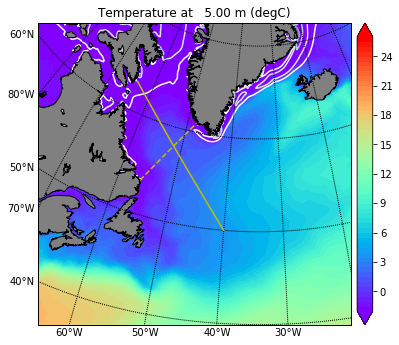

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


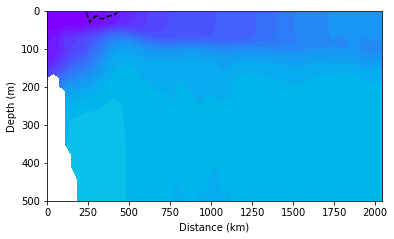

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


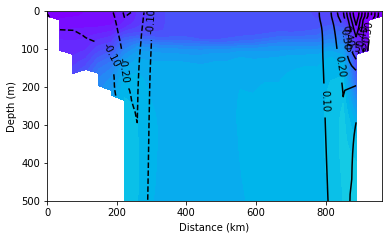

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


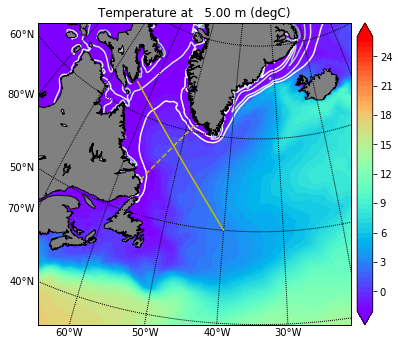

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


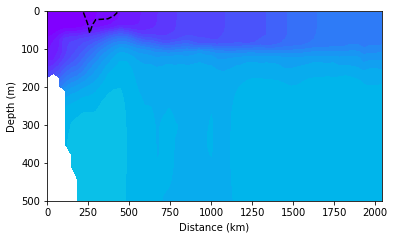

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


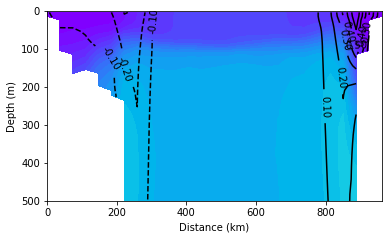

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


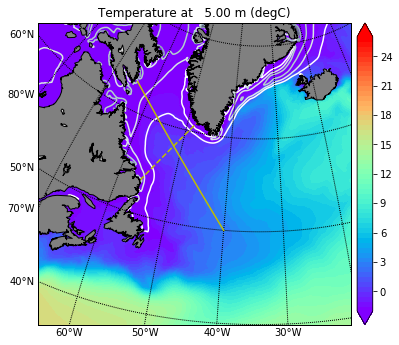

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


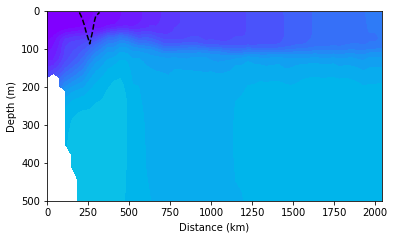

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


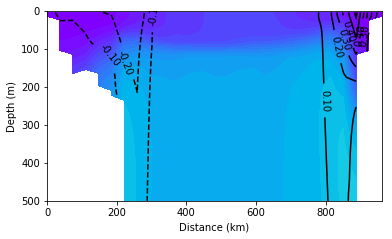

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


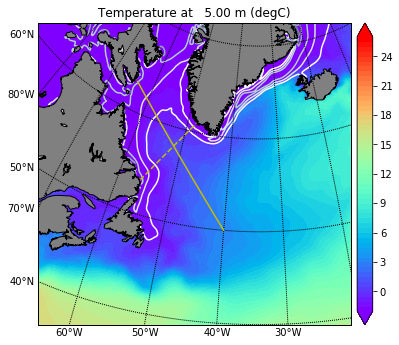

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


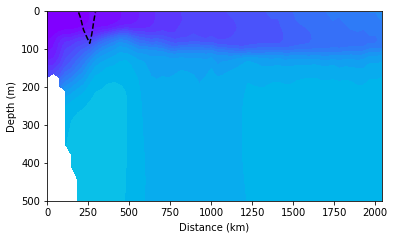

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


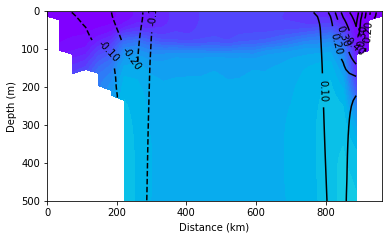

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


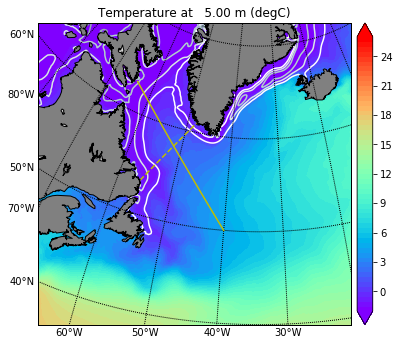

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


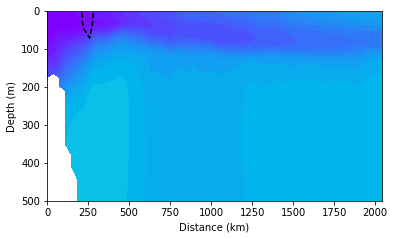

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


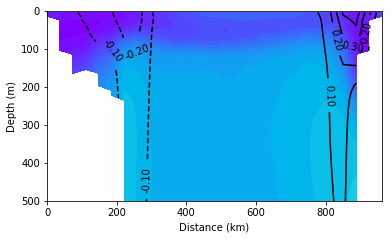

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


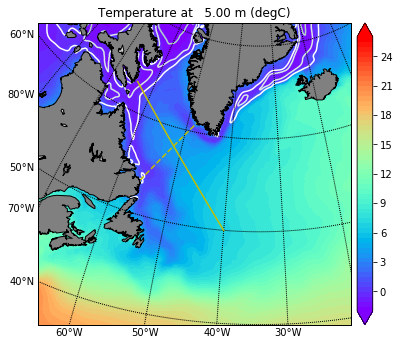

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


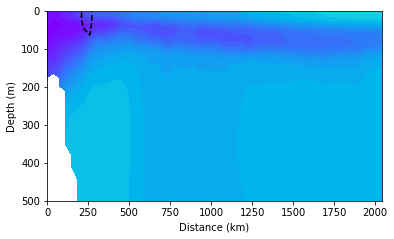

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


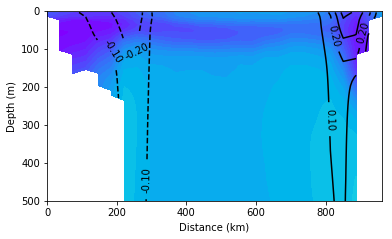

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


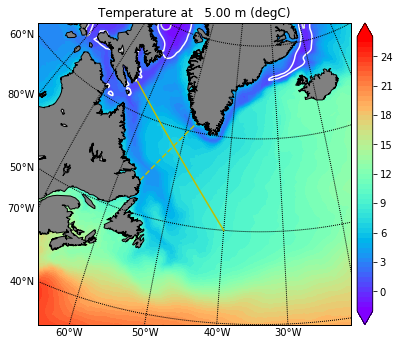

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


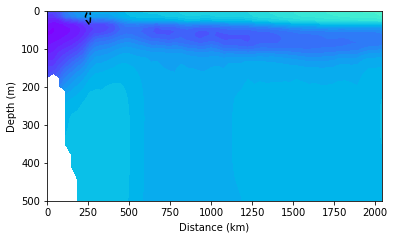

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


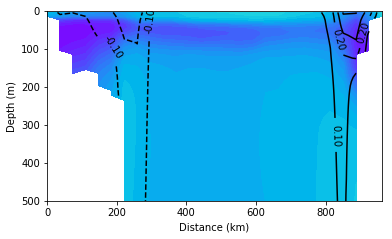

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


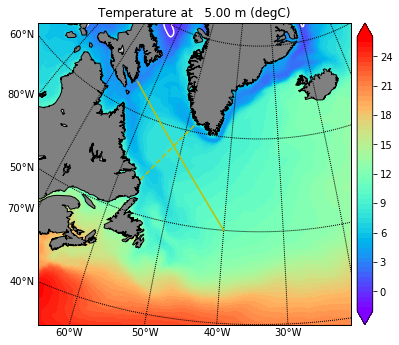

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


/home/qingli/.conda/envs/work/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


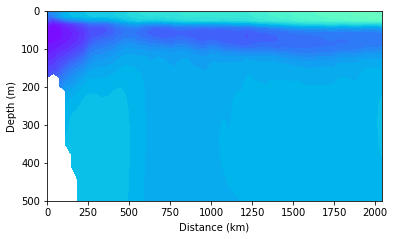

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


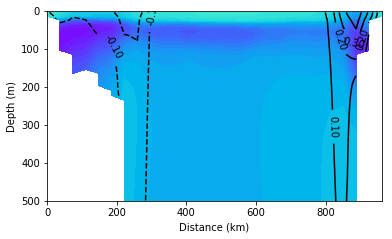

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


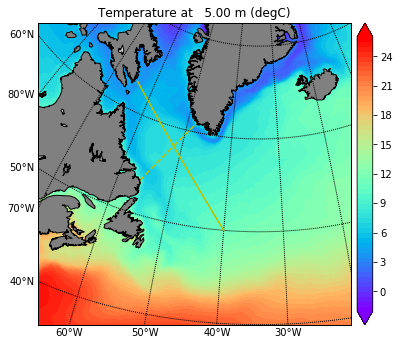

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


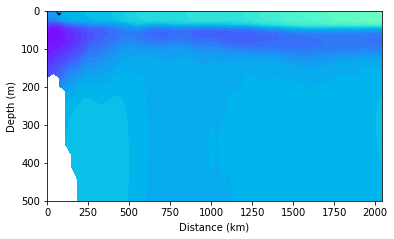

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


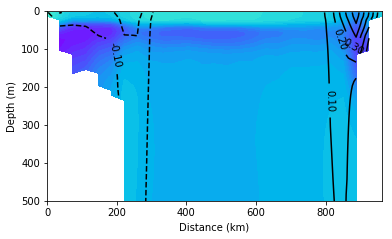

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


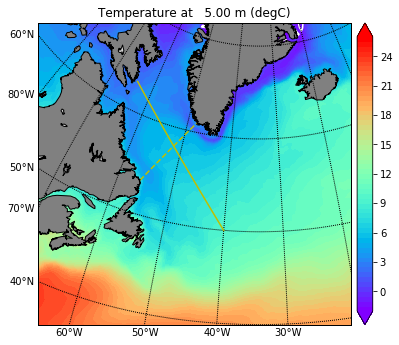

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


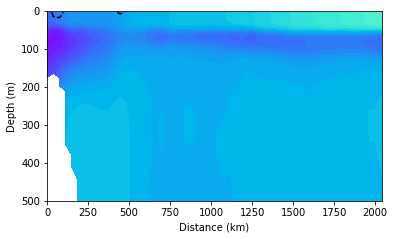

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


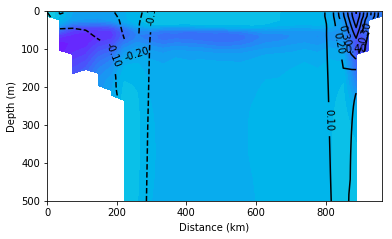

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


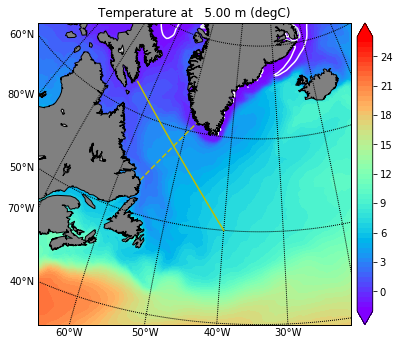

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


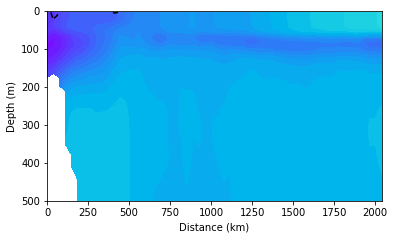

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


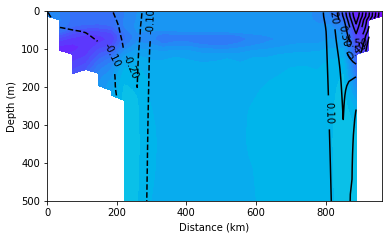

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Temperature at   5.00 m (degC) at region 'LabSea'


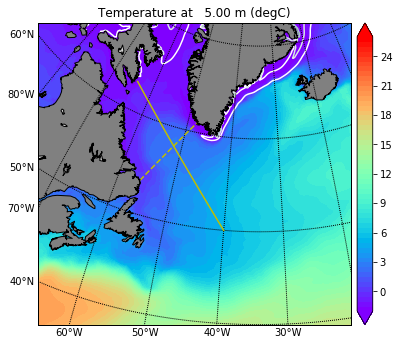

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


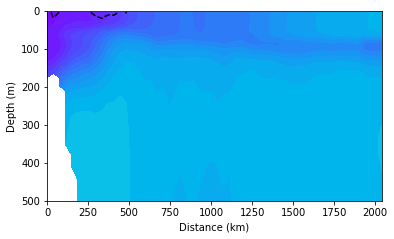

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


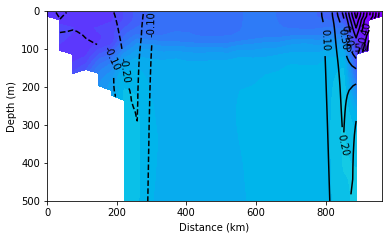

In [6]:
for i in np.arange(12):
    climo_file = climo_root+'/temperature/mpaso_{:02d}_climo.nc'.format(i+1)
    mpasodata = MPASOData(filepath=climo_file, filepath_mesh=rst_file)
    mpaso_temp = mpasodata.get_volume(varname='timeMonthly_avg_activeTracers_temperature',
                                      name='Temperature', units='degC')
    levels = np.linspace(-2, 26, 57)
    climo_file_ithick = climo_root_ice+'/iceThickness/mpascice_{:02d}_climo.nc'.format(i+1)
    mpascicedata = MPASCICEData(filepath=climo_file_ithick, filepath_mesh=rst_file)
    mpascice_ithick = mpascicedata.get_map(varname='timeMonthly_avg_iceVolumeCell',
                                           name='Ice thickness', units='m')
    levels_ithick = np.linspace(0.5, 5, 10)
    climo_file_velo = climo_root+'/velocity/mpaso_{:02d}_climo.nc'.format(i+1)
    mpasodata_velo = MPASOData(filepath=climo_file_velo, filepath_mesh=rst_file)
    mpaso_u = mpasodata_velo.get_volume(varname='timeMonthly_avg_velocityZonal',
                                        name='u', units='m/s')
    mpaso_v = mpasodata_velo.get_volume(varname='timeMonthly_avg_velocityMeridional',
                                        name='v', units='m/s')
    levels_velo = np.linspace(-1, 1, 21)
    levels_velo = np.delete(levels_velo, 10)
    
    # Temperature map at different depths
    fig = plt.figure(figsize=[6,6])
    mpaso_dat = mpaso_temp.get_map(depth=depth)
    m, f = mpaso_dat.plot(region='LabSea', ptype='contourf', levels=levels)
    m.drawgreatcircle(s1_s_lon, s1_s_lat, s1_e_lon, s1_e_lat, color='y')
    m.drawgreatcircle(s2_s_lon, s2_s_lat, s2_e_lon, s2_e_lat, color='y', linestyle='--')
    mpascice_ithick.overlay(m, levels=levels_ithick, cmap='bone_r')
    plt.show()
    figname = fig_root+'/LabSea_climo_{:02d}_Map_temperature_D{:d}.png'.format(i+1, depth)
    fig.savefig(figname, dpi = 300)
    plt.close(fig)
        
    # Vertical cross sections of temeprature
    # section 1
    fig = plt.figure(figsize=[6,3.5])
    mpaso_vcsec1 = mpaso_temp.get_transect(trnsct1)
    mpaso_vcsec1.plot(levels=levels, depth_mode=depth_mode, add_title=False, add_colorbar=False)
    ax = plt.gca()
    ax.set_ylim([500, 0])
    plot_transect_normal(mpaso_u, mpaso_v, trnsct1, name='Normal velocity', levels=levels_velo,
                         depth_mode=depth_mode, axis=ax, ptype='contour', colors='k', add_colorbar=False, 
                         add_title=False, invert_yaxis=False) 
    plt.show()
    figname = fig_root+'/LabSea_climo_{:02d}_VCSec1_{}_temperature.png'.format(i+1, depth_mode)
    fig.savefig(figname, dpi = 300)
    plt.close(fig)
    # section 2
    fig = plt.figure(figsize=[6,3.5])
    mpaso_vcsec2 = mpaso_temp.get_transect(trnsct2)
    mpaso_vcsec2.plot(levels=levels, depth_mode=depth_mode, add_title=False, add_colorbar=False)
    ax = plt.gca()
    ax.set_ylim([500, 0])
    plot_transect_normal(mpaso_u, mpaso_v, trnsct2, name='Normal velocity', levels=levels_velo,
                         depth_mode=depth_mode, axis=ax, ptype='contour', colors='k', add_colorbar=False,
                         add_title=False, invert_yaxis=False) 
    plt.show()
    figname = fig_root+'/LabSea_climo_{:02d}_VCSec2_{}_temperature.png'.format(i+1, depth_mode)
    fig.savefig(figname, dpi = 300)
    plt.close(fig)

## Salinity

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


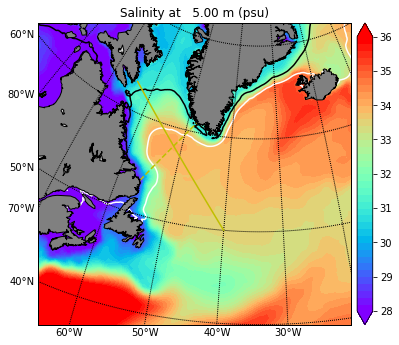

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


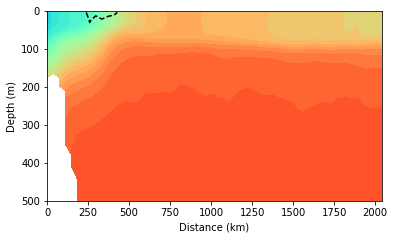

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


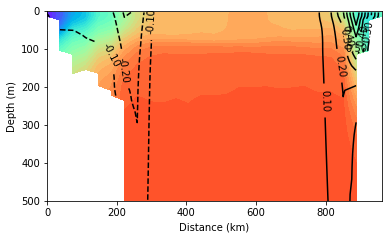

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


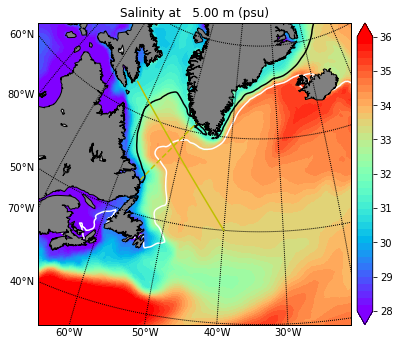

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


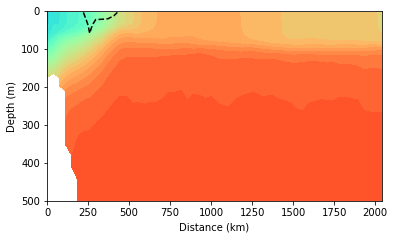

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


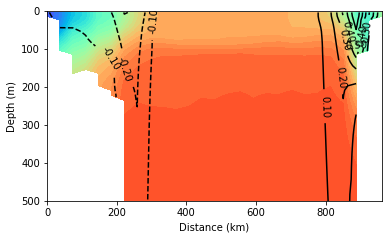

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


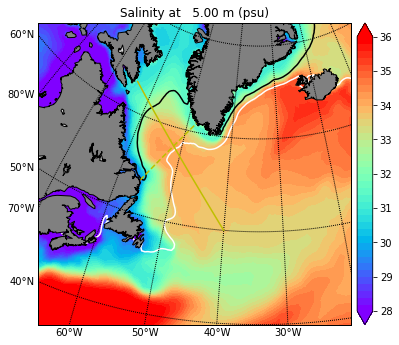

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


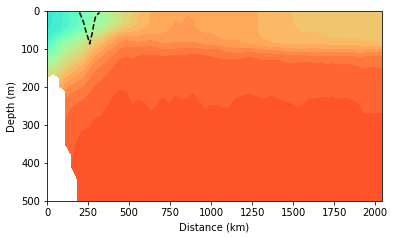

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


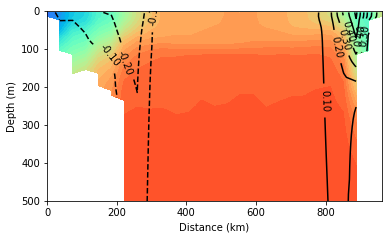

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


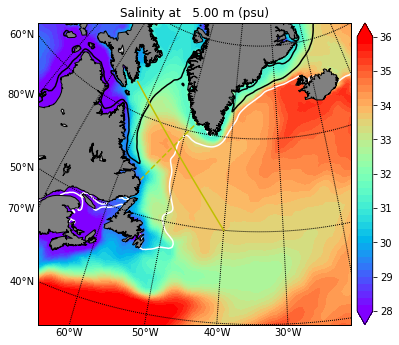

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


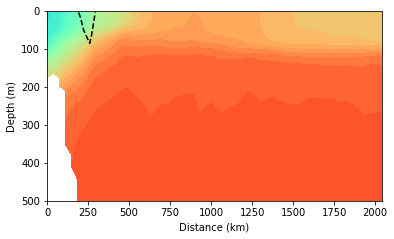

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


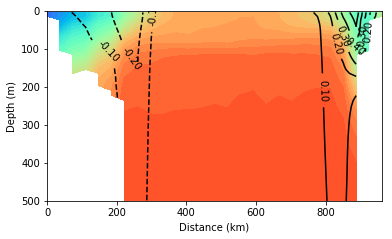

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


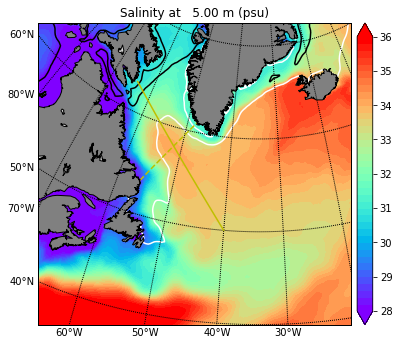

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


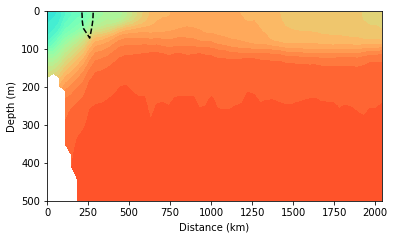

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


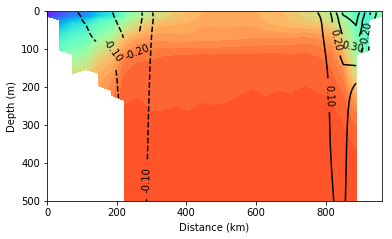

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


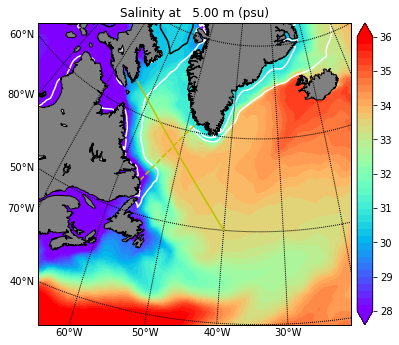

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


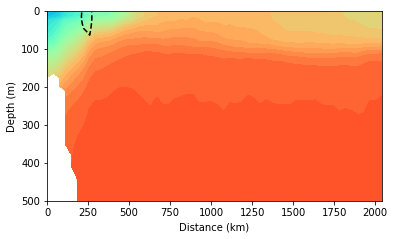

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


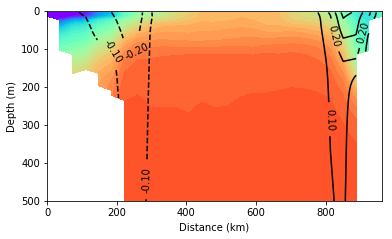

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


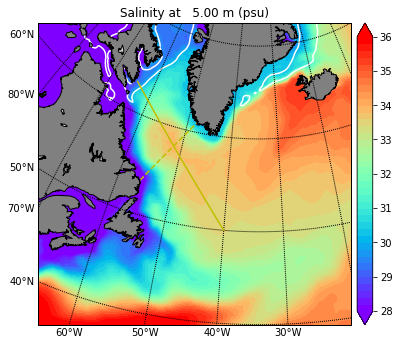

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


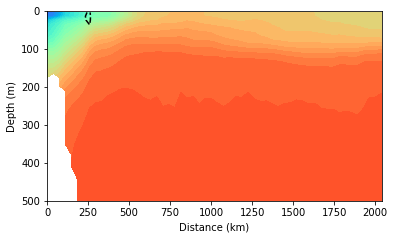

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


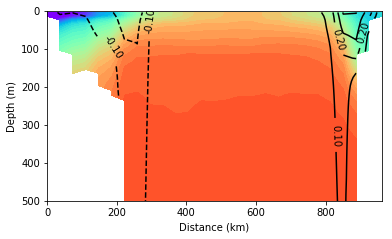

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


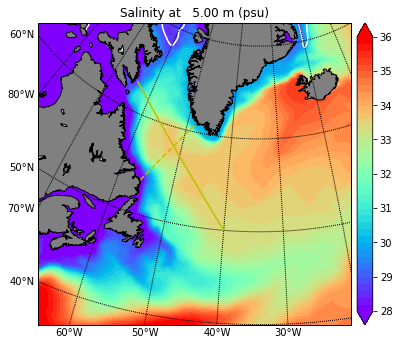

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


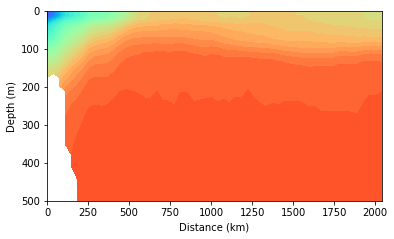

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


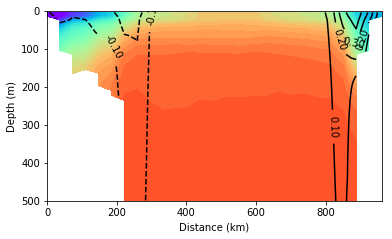

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


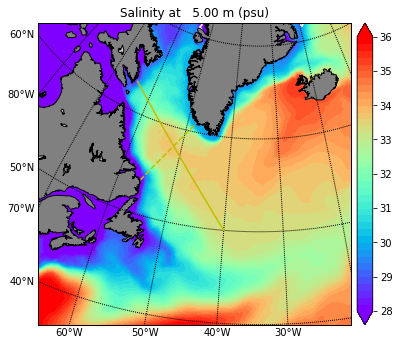

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


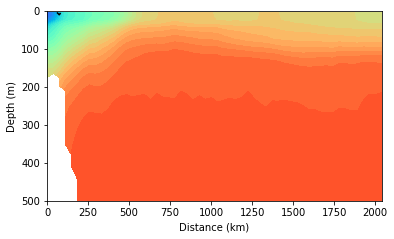

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


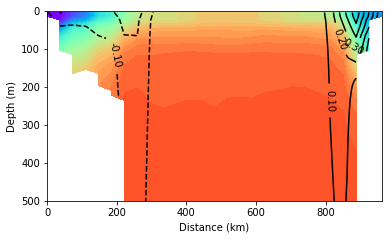

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


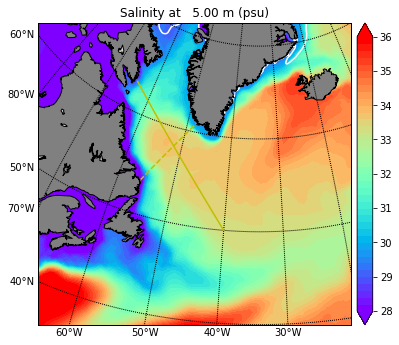

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


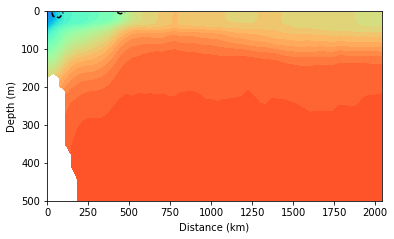

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


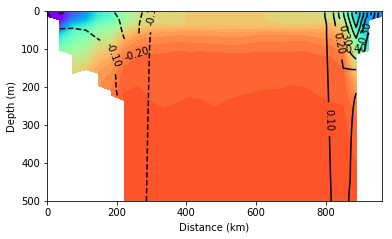

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


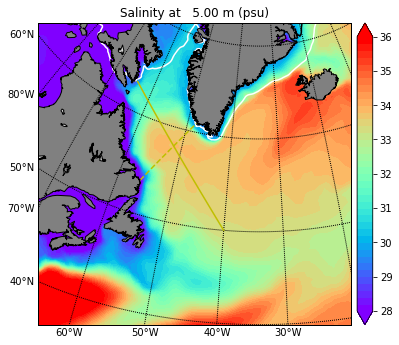

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


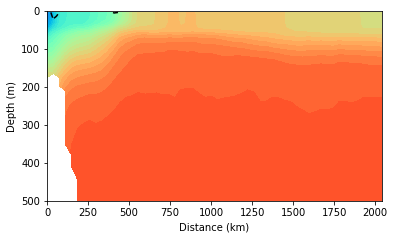

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


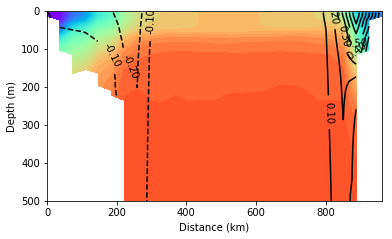

Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Reading mesh data from /lcrc/group/acme/jwolfe/acme_scratch/anvil/20190523.GM1800.A_WCYCL1850.ne30_oGNLD30to10.anvil/run/mpaso.rst.0051-01-01_00000.nc
Plotting map of Salinity at   5.00 m (psu) at region 'LabSea'


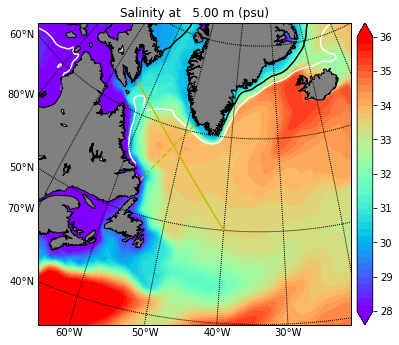

Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.
Nearest neighbor interpolation to 56 points.


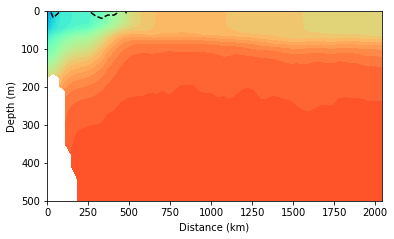

Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.
Nearest neighbor interpolation to 27 points.


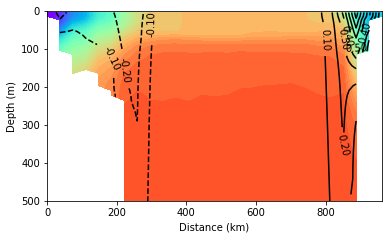

In [8]:
for i in np.arange(12):
    climo_file = climo_root+'/salinity/mpaso_{:02d}_climo.nc'.format(i+1)
    mpasodata = MPASOData(filepath=climo_file, filepath_mesh=rst_file)
    mpaso_salt = mpasodata.get_volume(varname='timeMonthly_avg_activeTracers_salinity',
                                      name='Salinity', units='psu')
    levels = np.linspace(28, 36, 41)
    climo_file_ifrac = climo_root_ice+'/iceFraction/mpascice_{:02d}_climo.nc'.format(i+1)
    mpascicedata = MPASCICEData(filepath=climo_file_ifrac, filepath_mesh=rst_file)
    mpascice_ifrac = mpascicedata.get_map(varname='timeMonthly_avg_iceAreaCell',
                                           name='Ice fraction', units='none')
    levels_ifrac = np.array([0.15, 0.85])
    climo_file_velo = climo_root+'/velocity/mpaso_{:02d}_climo.nc'.format(i+1)
    mpasodata_velo = MPASOData(filepath=climo_file_velo, filepath_mesh=rst_file)
    mpaso_u = mpasodata_velo.get_volume(varname='timeMonthly_avg_velocityZonal',
                                        name='u', units='m/s')
    mpaso_v = mpasodata_velo.get_volume(varname='timeMonthly_avg_velocityMeridional',
                                        name='v', units='m/s')
    levels_velo = np.linspace(-1, 1, 21)
    levels_velo = np.delete(levels_velo, 10)
    
    # Salinity map at different depths
    fig = plt.figure(figsize=[6,6])
    mpaso_dat = mpaso_salt.get_map(depth=depth)
    m, f = mpaso_dat.plot(region='LabSea', ptype='contourf', levels=levels)
    mpascice_ifrac.overlay(m, levels=levels_ifrac, cmap='bone_r')
    m.drawgreatcircle(s1_s_lon, s1_s_lat, s1_e_lon, s1_e_lat, color='y')
    m.drawgreatcircle(s2_s_lon, s2_s_lat, s2_e_lon, s2_e_lat, color='y', linestyle='--')
    plt.show()
    figname = fig_root+'/LabSea_climo_{:02d}_Map_salinity_D{:d}.png'.format(i+1, depth)
    fig.savefig(figname, dpi = 300)
    plt.close(fig)
        
    # Vertical cross sections of temeprature
    # section 1
    fig = plt.figure(figsize=[6,3.5])
    mpaso_vcsec1 = mpaso_salt.get_transect(trnsct1)
    mpaso_vcsec1.plot(levels=levels, depth_mode=depth_mode, add_title=False, add_colorbar=False)
    ax = plt.gca()
    ax.set_ylim([500, 0])
    plot_transect_normal(mpaso_u, mpaso_v, trnsct1, name='Normal velocity', levels=levels_velo,
                         depth_mode=depth_mode, axis=ax, ptype='contour', colors='k', add_colorbar=False, 
                         add_title=False, invert_yaxis=False) 
    plt.show()
    figname = fig_root+'/LabSea_climo_{:02d}_VCSec1_{}_salinity.png'.format(i+1, depth_mode)
    fig.savefig(figname, dpi = 300)
    plt.close(fig)
    # section 2
    fig = plt.figure(figsize=[6,3.5])
    mpaso_vcsec2 = mpaso_salt.get_transect(trnsct2)
    mpaso_vcsec2.plot(levels=levels, depth_mode=depth_mode, add_title=False, add_colorbar=False)
    ax = plt.gca()
    ax.set_ylim([500, 0])
    plot_transect_normal(mpaso_u, mpaso_v, trnsct2, name='Normal velocity', levels=levels_velo,
                         depth_mode=depth_mode, axis=ax, ptype='contour', colors='k', add_colorbar=False,
                         add_title=False, invert_yaxis=False) 
    plt.show()
    figname = fig_root+'/LabSea_climo_{:02d}_VCSec2_{}_salinity.png'.format(i+1, depth_mode)
    fig.savefig(figname, dpi = 300)
    plt.close(fig)